<a href="https://colab.research.google.com/github/SDP1122/StockPredictor/blob/main/stockPredictML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Prediction of a stock price (coca-cola / KO) for a specific day
#Using machine learning algorithms (3 models)

In [3]:
!pip install --upgrade pandas-datareader 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [4]:
#Import libraries
from sklearn.svm import SVR
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [5]:
#Load the data
df = web.DataReader('KO', data_source='yahoo', start='2020-10-01', end='2020-10-30')

In [6]:
df.describe()


,High,Low,Open,Close,Volume,Adj Close
count,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000
mean,50.181818,49.309091,49.754091,49.724546,1.328154e+07,47.125972
std,0.871406,0.962789,0.927724,0.874761,3.050049e+06,0.829047
min,48.119999,47.299999,47.730000,47.959999,9.930400e+06,45.453640
25%,49.677500,48.860002,49.407501,49.365001,1.071420e+07,46.785218
50%,50.389999,49.500000,49.850000,49.945002,1.300435e+07,47.334908
75%,50.599999,49.849999,50.267500,50.242500,1.461362e+07,47.616859
max,51.529999,50.830002,51.169998,51.090000,2.018920e+07,48.420067


In [9]:
#Show & store last row of data. This is what we will predict
actual_price = df.tail(1)
actual_price

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-29,48.48,47.299999,47.73,48.02,15369900,45.510509


In [10]:
#Get all of the data except last row
df = df.head(len(df)-1)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-01,49.660000,48.590000,49.439999,49.180000,17577300,46.609882
2020-10-02,49.580002,48.549999,48.759998,49.360001,13610100,46.780479
2020-10-05,49.549999,49.119999,49.430000,49.380001,10628700,46.799435
2020-10-06,49.730000,48.830002,49.549999,48.939999,10077400,46.382427
2020-10-07,49.759998,48.950001,49.020000,49.560001,10135600,46.970028
2020-10-08,50.540001,49.540001,49.709999,50.459999,12143900,47.822990
2020-10-09,51.230000,50.599998,50.669998,50.810001,11407800,48.154705
2020-10-12,51.529999,50.830002,50.840000,51.090000,11386500,48.420067
2020-10-13,50.990002,49.900002,50.990002,50.220001,14365300,47.595539


In [20]:
#Get only the dates and adjusted close prices
#df_days = df.loc[:,'Date']
df_days = list(df.index)
df_adjusted_close = df.loc[:,'Adj Close']


In [24]:
#Create empty lists
days = list()
adj_close_prices = list()

#Create independent data set
for day in df_days:
  days.append([day.day]) #day is a datetime object
  
#Create the dependent data set (adj close prices)
for price in df_adjusted_close:
  adj_close_prices.append(float(price))

#days = days.reshape(-1,1)

In [26]:
#show the days & adj closed prices
#days
#adj_close_prices

[46.60988235473633,
 46.780479431152344,
 46.799434661865234,
 46.38242721557617,
 46.970027923583984,
 47.82299041748047,
 48.15470504760742,
 48.420066833496094,
 47.59553909301758,
 47.50075912475586,
 47.3775520324707,
 47.415462493896484,
 47.026885986328125,
 47.623966217041016,
 47.3775520324707,
 48.031490325927734,
 47.87985610961914,
 47.19748306274414,
 47.29226303100586,
 45.45363998413086]

In [29]:
#Create 3 models to predict the last day price
#Model 1: linear SVR
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)

#Model 2: poly SVR
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)

#Model 3: rbf SVR
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.85)
rbf_svr.fit(days,adj_close_prices)


SVR(C=1000.0, gamma=0.85)

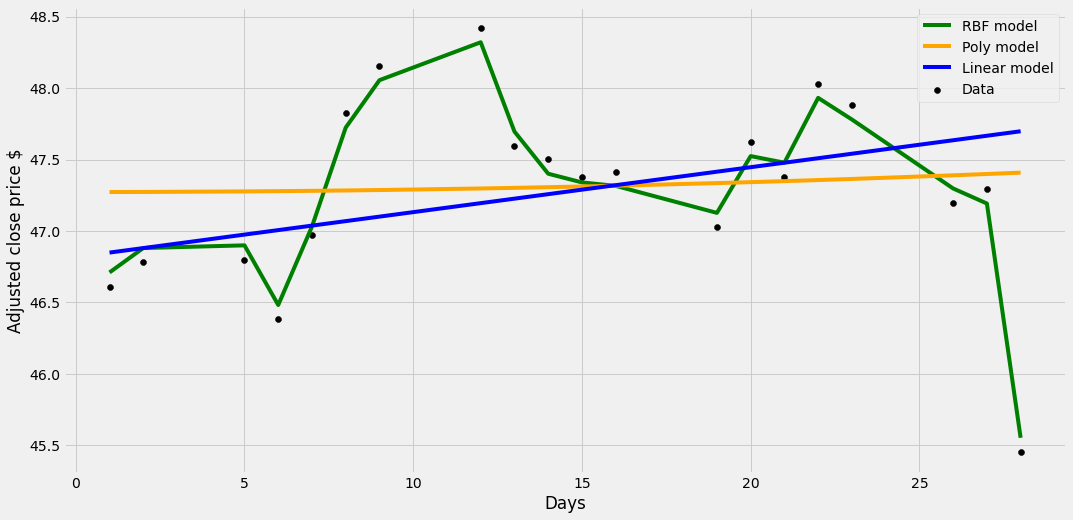

In [31]:
#Plot the model outputs
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color='black', label='Data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF model')
plt.plot(days, poly_svr.predict(days), color='orange', label='Poly model')
plt.plot(days, lin_svr.predict(days), color='blue', label='Linear model')
plt.xlabel('Days')
plt.ylabel('Adjusted close price $')
plt.legend()
plt.show()


In [32]:
#Show predicted price for the given date (day 29th Oct 2020)
day = [[29]]
print('The RBF SVR predicted price:', rbf_svr.predict(day))
print('The Linear SVR predicted price:', lin_svr.predict(day))
print('The Poly SVR predicted price:', poly_svr.predict(day))

The RBF SVR predicted price: [46.39049582]
The Linear SVR predicted price: [47.72895102]
The Poly SVR predicted price: [47.41796877]


In [38]:
#Show actual price
print('Actual price is: ', actual_price['Adj Close'][0])

Actual price is:  45.5105094909668
